---
title: Fashion MNIST
categories: deep-learning
date: 2020-12-15
---


数据集State-of-the-Art详见

- [mnist](https://paperswithcode.com/sota/image-classification-on-mnist)
- [fashion-mnist](https://paperswithcode.com/sota/image-classification-on-fashion-mnist)
- [cifar-10](https://paperswithcode.com/sota/image-classification-on-cifar-10)

## 初始化

首先引入所用的包。然后是一些公共函数。下面代码比较长，可以先把函数的中文解释看过就好，细节忽略，后面用到再回来看。

In [1]:
import sys
import numpy as np
from tensorflow.keras import Model, layers, regularizers, preprocessing

base_path = '/tf/eipi10/xuxiangwen.github.io/_notes/05-ai/54-tensorflow/code'
sys.path.append(base_path)

from image_classification import set_gpu_memory, lr_schedule, image_data_generator 
from image_classification import ImageClassificationHelper, ImageDataset

set_gpu_memory(1024)
model_results={}

# 代码自动重新加载
%load_ext autoreload
%autoreload 2

# #当module有新的方法的时候，需要运行下面方法。
# %reload_ext autoreload

set max gpu memory to 1024


下面初始化模型运行的参数。

In [2]:
params = {
    'dataset_name': 'cifar10',
    'validation_percent': 0,    
    'use_data_augmentation': False,
    'augmentation_generator': image_data_generator(),     
    'batch_size': 32,    
    'epochs': 120,    
    'learning_rate':0.001,
    'dropout':0.1,
    'metrics':['accuracy'], 
    'use_best_checkpoint': True,
    'callbacks': {
        'ModelCheckpoint': {
            'enabled': True,
            'monitor': 'val_accuracy',               
        },
        'EarlyStopping': {
            'enabled': True,
            'patience': 40,   
            'monitor': 'val_accuracy',            
        },
        'ReduceLROnPlateau': {
            'enabled': True,
            'monitor': 'val_loss',
            'patience': 15,
            'factor': np.sqrt(0.1),            
        },
        'LearningRateScheduler': {
            'enabled': True,
            'schedule': lr_schedule,            
        }             
    },
    'model_params':{
        'mlp':{'dropout':0.1},
        'lenet':{'dropout':0.2},
        'custom':{'dropout':0.2},
        'vgg':{'dropout':0.4},
        'resnet':{}
    }
}

helper = ImageClassificationHelper(params, model_results)
helper.set_data(ImageDataset(helper.params))

load cifar10 data from source
train: (50000, 32, 32, 3) (50000,)
test: (10000, 32, 32, 3) (10000,)
create train, validation and test dataset


## 数据

MNIST数据集包含60,000张training图片和10,000张test图片，每张图片由$28\times28$ 个像素点构成，每个像素点用一个灰度值(0−255)表示。下面查看一下其中的图片。

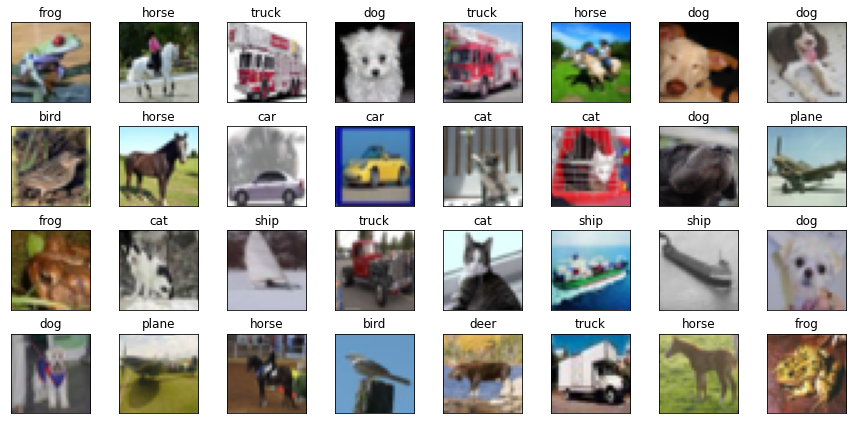

In [3]:
images, labels = iter(helper.data.train_dataset).next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

然后看看做了data augmentation的图片。

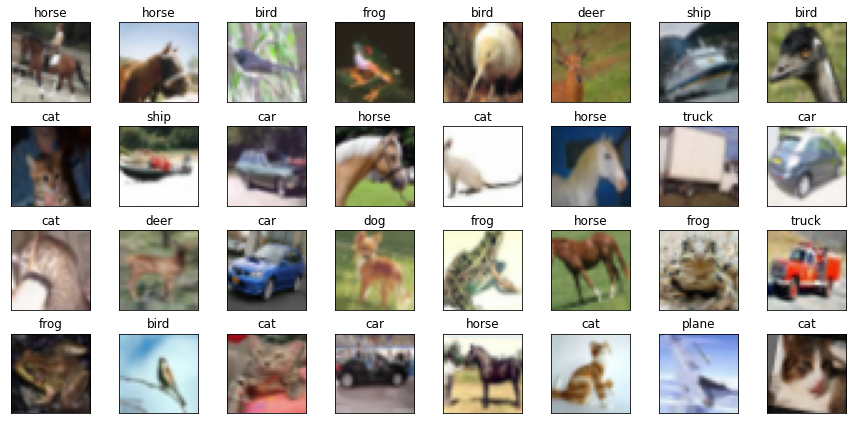

In [4]:
images, labels = helper.data.train_dataset_aug.next()
helper.show_images(images, labels, x_num=4, y_num=8, figsize=(12, 6))

下面来看看各个class的数据分布。可以看到各个数字的分布还是比较均匀的。

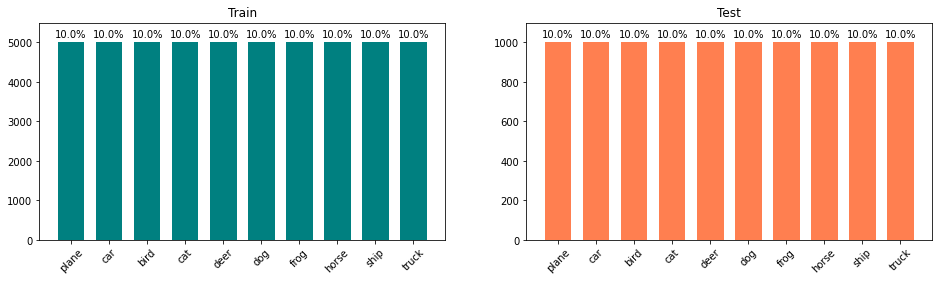

In [5]:
helper.plot_distribution()

## MLP

In [6]:
def get_mlp(helper, name='mlp', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Flatten()(input)
    x = layers.Dense(128, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model

model = get_mlp(helper)
model.summary()

dropout=0.1
learning_rate=0.001
checkpoint_path=./checkpoints/cifar10/mlp/checkpoint
Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________




下面来训练模型。

In [ ]:
history = helper.train(model, epochs=helper.params.epochs)

2020-12-31 07:19:29,939: INFO: start training


ModelCheckpoint=(filepath=./checkpoints/cifar10/mlp/checkpoint, monitor=val_accuracy)
EarlyStopping(monitor=val_accuracy, patience=40)
ReduceLROnPlateau=(monitor=val_loss, factor=0.31622776601683794, patience=15)
LearningRateScheduler=()
Epoch 1/120
1562/1562 [==============================] - 4s 3ms/step - loss: 1.9835 - accuracy: 0.2702 - val_loss: 1.8445 - val_accuracy: 0.3419
Epoch 2/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8757 - accuracy: 0.3158 - val_loss: 1.7973 - val_accuracy: 0.3581
Epoch 3/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8527 - accuracy: 0.3252 - val_loss: 1.7666 - val_accuracy: 0.3678
Epoch 4/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8396 - accuracy: 0.3300 - val_loss: 1.7658 - val_accuracy: 0.3632
Epoch 5/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.8257 - accuracy: 0.3384 - val_loss: 1.7777 - val_accuracy: 0.3514
Epoch 6/120
1562/1562 [==============

1562/1562 [==============================] - 4s 2ms/step - loss: 1.7170 - accuracy: 0.3796 - val_loss: 1.6950 - val_accuracy: 0.3914
Epoch 00050: Still keep learning rate 0.0003162 instead of 0.001
Epoch 50/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7161 - accuracy: 0.3802 - val_loss: 1.6924 - val_accuracy: 0.3921
Epoch 00051: Still keep learning rate 0.0003162 instead of 0.001
Epoch 51/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7138 - accuracy: 0.3820 - val_loss: 1.6983 - val_accuracy: 0.3889
Epoch 00052: Still keep learning rate 0.0003162 instead of 0.001
Epoch 52/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7110 - accuracy: 0.3842 - val_loss: 1.6944 - val_accuracy: 0.3913
Epoch 00053: Still keep learning rate 0.0003162 instead of 0.001
Epoch 53/120
1562/1562 [==============================] - 4s 2ms/step - loss: 1.7138 - accuracy: 0.3795 - val_loss: 1.7013 - val_accuracy: 0.3903
Epoch 00054: Still keep

In [ ]:
helper.model_summary(model, history=history)




从上面的错误来看，模型对一些细节的判断不是很准。下面来尝试一下LeNet。

## LeNet

![image-20201019113632136](images/image-20201019113632136.png)

LeNet诞生于1994年，是Yann LeCun等人提出的，是最早的卷积神经网络之一。在LeNet中，输入层是32×32的图片，而MNIST是28×28的图片，为了保持模型的结构不变，在第一个Conv2D设置参数padding=’same’。首先创建模型，并训练。

In [ ]:
def get_lenet(helper, name='lenet', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name) 
    print('dropout={}'.format(dropout))
    
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(6, (5, 5), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(16, (5, 5), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(84, activation='relu')(x)   
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)  

    return model    

# 创建模型
model = get_lenet(helper)
model.summary()



下面来训练模型。

In [ ]:
# 训练
history = helper.train(model, epochs=helper.params.epochs)



下面来评估模型并和mlp模型进行对比。

In [ ]:
helper.model_summary(model, history=history)



从上面的图中，可以看到，Lenet的参数只有mlp的60%，但其的准确率比mlp提升了差不多1%。上面最后一张图中，有三列，第一列是数字图片，它们是mlp中分错的数字，第二列是mlp中的分类，第三列是lenet中的分类，可以看到lenet的确学到了一些mlp中没有的模式。下面再来看看哪些数字在lenet也分错了。


上图中，可以看到对于部分数字的识别，mlp甚至要更好一点啊，还有一些数字，则是一起都错了。

## Custom 1

下面自己定义一个模型，这个模型和lenet的主要区别是，增加了卷积的深度。

In [ ]:
def get_custom1(helper, name='custom_cnn', dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x) 
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    if dropout>0: x = layers.Dropout(dropout)(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)  
    if dropout>0: x = layers.Dropout(dropout)(x)
    x = layers.Dense(10)(x)  
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model   

# 创建模型
model = get_custom1(helper)
model.summary()


可以发现参数的个数已经和mlp差不多了，下面来训练模型。

In [ ]:
# 训练
history = helper.train(model, epochs=helper.params.epochs)



下面来评估模型并和lenet模型进行对比。

In [ ]:
helper.model_summary(model, history=history)



可以看到custom1模型的效果比lenet有些许提升（经过多次测试，平均好0.1-0.3个百分点）。上面最后一幅图，也能看到custom1模型学习到了不少新的模式。下面来看错误分析。

## VGG

In [ ]:
def get_block(x, filters, conv_count, kernel_size=(3, 3), padding='same', use_bn=True, dropout=0, block_name='block'):
    for i in range(conv_count):
        x = layers.Conv2D(filters, kernel_size, padding=padding, name='{}_con{}'.format(block_name, i+1))(x)
        if use_bn: x = layers.BatchNormalization(name='{}_bn{}'.format(block_name, i+1))(x)
        x = layers.ReLU(name='{}_relu{}'.format(block_name, i+1))(x)
    x = layers.MaxPooling2D((2, 2), name='{}_maxpooling1'.format(block_name))(x)
    if dropout>0: x = layers.Dropout(dropout, name='{}_dropout1'.format(block_name))(x)
    return x
    
def get_vgg(helper, name='vgg',
              dense_layer_count=1, 
              dense_layer_units=128,
              conv_filters=64,
              block_count=3,
              use_bn=True,
              dropout=None):
    if dropout is None:
        dropout = helper.get_dropout(name)
    print('dropout={}'.format(dropout))
        
    input = layers.Input(shape=helper.data.input_shape)
    x = input    
    for i in range(block_count): 
        x = get_block(x, conv_filters, conv_count=2, use_bn=use_bn, dropout=dropout, 
                      block_name='block{}'.format(i+1))
        conv_filters = conv_filters*2
                    
    x = layers.Flatten()(x)
    for i in range(dense_layer_count):
        x = layers.Dense(128, activation='relu')(x)
        if dropout>0: x = layers.Dropout(dropout)(x)    
    x = layers.Dense(10)(x)
    
    model = Model(inputs=input, outputs=x, name=name) 
    helper.compile(model)
    return model


model = get_vgg(helper, dense_layer_count=1, block_count=3, name='vgg8')
model.summary()



In [ ]:
# 训练
history = helper.train(model, epochs=helper.params.epochs)

In [ ]:
helper.model_summary(model, history=history)

## Resnet

参考https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter2-deep-networks/resnet-cifar10-2.2.1.py

In [ ]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    Arguments:
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or bn-activation-conv (False)
    Returns:
        x (tensor): tensor as input to the next layer
    """
    conv = layers.Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=regularizers.l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = layers.BatchNormalization()(x)
        if activation is not None:
            x = layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10, name='resnet_v1'):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved
    (downsampled) by a convolutional layer with strides=2, while 
    the number of filters is doubled. Within each stage, 
    the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    Arguments:
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    Returns:
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, in [a])')
    # start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            # first layer but not first stack
            if stack > 0 and res_block == 0:  
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            # first layer but not first stack
            
            if stack > 0 and res_block == 0:
                # linear projection residual shortcut
                # connection to match changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = layers.add([x, y])
            x = layers.Activation('relu')(x)

        num_filters *= 2

    # add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = layers.AveragePooling2D(pool_size=7)(x)
    y = layers.Flatten()(x)
    outputs = layers.Dense(num_classes, kernel_initializer='he_normal')(y)

    # instantiate model.
    model = Model(inputs=inputs, outputs=outputs, name=name)
    return model

def get_resnet_v1(helper, depth=32, name='resnet_v1'):       
    model = resnet_v1(helper.data.input_shape, depth=depth, name='{}_{}'.format(name, depth))
    helper.compile(model)
    return model

model = get_resnet_v1(helper, depth=20)
model.summary()

In [ ]:
history = helper.train(model, epochs=helper.params.epochs)

In [ ]:
helper.model_summary(model, history=history)

## 总结